#TP 2 ICD

Integrantes (Matrícula):

Arthur (),

Daniel Oliveira Barbosa (2020006450),

Frederico (),

Luís (2020041604),

Pedro (),

**Faremos aqui uma análise exploratória dos dado que coletamos.**

# Introdução

**Aqui importamos as bibliotecas necessárias para fazermos a análise exploratoria dos dados**

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator

**Aqui importamos o nosso data set de dados de venda de imóveis de um site de imobiliária de Belo Horizonte. Além disso, visualizamos alguns dados do head do data set**

In [2]:
url = 'https://raw.githubusercontent.com/FredericoBaker/Decisao-Imoveis-Scrapping/main/bd_DecisaoImoveis.csv'
df = pd.read_csv(url)
df.head()

,Código,Título,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,NaN,2.0,2.0,1.0,3.0,NaN,NaN,1350000.0
1,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,NaN,2.0,2.0,1.0,3.0,NaN,NaN,1450000.0
2,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,NaN,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
3,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,NaN,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
4,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,NaN,2.0,2.0,1.0,2.0,NaN,NaN,1226000.0


**Agora vamos analisar informações gerais do nosso data set**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2492 non-null   int64  
 1   Título          2492 non-null   object 
 2   Bairro          2492 non-null   object 
 3   Endereço        2492 non-null   object 
 4   Área interna    2424 non-null   float64
 5   Área externa    301 non-null    float64
 6   # de quartos    1995 non-null   float64
 7   # de banheiros  2248 non-null   float64
 8   # de suítes     1806 non-null   float64
 9   # de vagas      2058 non-null   float64
 10  IPTU            1702 non-null   float64
 11  Condomínio      1462 non-null   float64
 12  Preço           2492 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 253.2+ KB


# Adição Coluna Tipo Imóvel

**Veja que não há coluna que contém o tipo do imóvel (apartamento, casa, lote, etc...). Então, vamos agora seguir um conjunto de passos para conseguir extrair essa informação da coluna Título e adicionar essa informação em uma nova coluna Tipo Imóvel**

In [4]:
# Primeiro vamos extrair os valores únicos da coluna Título para analisarmos

titsUnicos = df['Título'].unique()

print(titsUnicos)



['Cobertura à venda, Carmo - Belo Horizonte/MG'
 'Apartamento 2 Quartos à venda, Carmo - Belo Horizonte/MG'
 'Área privativa à venda, Carmo - Belo Horizonte/MG'
 'Apartamento 2 Quartos à venda, Serra - Belo Horizonte/MG'
 'Área privativa à venda, Serra - Belo Horizonte/MG'
 'Apartamento 4 Quartos à venda, Serra - Belo Horizonte/MG'
 'Área privativa à venda, Funcionários - Belo Horizonte/MG'
 'Área privativa à venda, Floresta - Belo Horizonte/MG'
 'Prédio Comercial à venda, Funcionários - Belo Horizonte/MG'
 'Cobertura à venda, Anchieta - Belo Horizonte/MG'
 'Casa à venda, Serra - Belo Horizonte/MG'
 'Apartamento 3 Quartos à venda, São Lucas - Belo Horizonte/MG'
 'Apartamento 2 Quartos à venda, São Lucas - Belo Horizonte/MG'
 'Apartamento 3 Quartos à venda, Colégio Batista - Belo Horizonte/MG'
 'Cobertura à venda, Serra - Belo Horizonte/MG'
 'Apartamento 4 Quartos à venda, Sion - Belo Horizonte/MG'
 'Apartamento 3 Quartos à venda, Cruzeiro - Belo Horizonte/MG'
 'Apartamento 2 Quartos à 

**Baseado no site deles, vemos que os tipos de imóveis são:**

1. Apartamento
2. Área privativa
3. Cobertura
4. Prédio Comercial
5. Casa
6. Andar corrido
7. Pilotis
8. Sala
9. Lote
10. Garagem
11. Galpão
12. Estacionamento
13. Apart hotel / Flat
14. Loja
15. Terreno
16. Comercial - Mobiliado
17. Casa para fins comerciais

**Assim, vamos criar uma função que extrai essas palavras da colunta Título para adicionarmos ela na nossa nova coluna Tipo Imóvel**

In [5]:
def extraiTipoImovel(colunaTitulo):
    # colocamos 'Casa para fins comerciais' antes de 'Casa' para não dar 
    # match nos dois para o mesmo título

    tipoImovelAExtrair = [
        'Apartamento', 'Área privativa', 'Cobertura', 'Prédio Comercial', 'Casa para fins comerciais', 'Casa',
        'Andar corrido', 'Pilotis', 'Sala', 'Lote', 'Garagem', 'Galpão',
        'Estacionamento', 'Apart hotel / Flat', 'Loja', 'Terreno',
        'Comercial - Mobiliado'
    ]

    tipoImovelExtraido = []

    for titulo in colunaTitulo:
        for tipoImovel in tipoImovelAExtrair:
            if re.search(r'\b{}\b'.format(re.escape(tipoImovel)), titulo, flags=re.IGNORECASE):
                tipoImovelExtraido.append(tipoImovel)
                break # para ser mais eficiente e não dar match em Casa e Casa para fins comerciais para o mesmo título

    return tipoImovelExtraido

colunaASerAdicionada = extraiTipoImovel(df['Título'])

# printa array que será adicionado a coluna Tipo Imóvel
print(colunaASerAdicionada)

# printa verificação se todos os tipos de imóveis estão sendo matched corretamente (resultado esperado = 17)
print(len(list(set(colunaASerAdicionada))))

# printa verificação se todas as linhas da coluna Título estão sendo matched (resultado esperado = 2492)
print(len(colunaASerAdicionada))

['Cobertura', 'Cobertura', 'Apartamento', 'Apartamento', 'Área privativa', 'Área privativa', 'Área privativa', 'Apartamento', 'Área privativa', 'Apartamento', 'Área privativa', 'Apartamento', 'Apartamento', 'Apartamento', 'Área privativa', 'Prédio Comercial', 'Área privativa', 'Cobertura', 'Casa', 'Apartamento', 'Apartamento', 'Apartamento', 'Cobertura', 'Cobertura', 'Apartamento', 'Área privativa', 'Apartamento', 'Área privativa', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Cobertura', 'Cobertura', 'Apartamento', 'Apartamento', 'Área privativa', 'Área privativa', 'Cobertura', 'Apartamento', 'Apartamento', 'Cobertura', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Cobertura', 'Apartamento', 'Área privativa', 'Andar corrido', 'Andar corrido', 'Pilotis', 'Andar corrido', 'Apartamento', 'Apartamento', 'Apartamento', 'Área privativa', 'Apartamento', 'Apartamento', 'Apartamento', 'Apartamento', 'Sala', 'Apartamento', 'Apartamento', 'Apartamento

**Veja que essa função extrai com sucesso os tipos de imóveis de cada título, visto que o número de itens da lista é igual ao size da coluna Título (2492) e todos os tipos de imóveis estão sendo extraídos (17 tipos).**

**Agora vamos criar uma nova coluna Tipo Imóvel e adicionar ao dataset**

In [6]:
df.insert(2, 'Tipo Imóvel', colunaASerAdicionada)

df.head()

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,NaN,2.0,2.0,1.0,3.0,NaN,NaN,1350000.0
1,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,NaN,2.0,2.0,1.0,3.0,NaN,NaN,1450000.0
2,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,NaN,2.0,2.0,1.0,2.0,NaN,NaN,915000.0
3,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,NaN,2.0,2.0,1.0,2.0,NaN,NaN,883000.0
4,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,NaN,2.0,2.0,1.0,2.0,NaN,NaN,1226000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2492 non-null   int64  
 1   Título          2492 non-null   object 
 2   Tipo Imóvel     2492 non-null   object 
 3   Bairro          2492 non-null   object 
 4   Endereço        2492 non-null   object 
 5   Área interna    2424 non-null   float64
 6   Área externa    301 non-null    float64
 7   # de quartos    1995 non-null   float64
 8   # de banheiros  2248 non-null   float64
 9   # de suítes     1806 non-null   float64
 10  # de vagas      2058 non-null   float64
 11  IPTU            1702 non-null   float64
 12  Condomínio      1462 non-null   float64
 13  Preço           2492 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 272.7+ KB


# Valores Nulos Área Interna

**Veja que a coluna de Área interna possui valores nulos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2492 non-null   int64  
 1   Título          2492 non-null   object 
 2   Tipo Imóvel     2492 non-null   object 
 3   Bairro          2492 non-null   object 
 4   Endereço        2492 non-null   object 
 5   Área interna    2424 non-null   float64
 6   Área externa    301 non-null    float64
 7   # de quartos    1995 non-null   float64
 8   # de banheiros  2248 non-null   float64
 9   # de suítes     1806 non-null   float64
 10  # de vagas      2058 non-null   float64
 11  IPTU            1702 non-null   float64
 12  Condomínio      1462 non-null   float64
 13  Preço           2492 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 272.7+ KB


**Vamos filtrar o dataframe para apenas as rows que possuem valores nulos da coluna Área interna**

In [9]:
areaInternaNula = df[df['Área interna'].isnull()]

areaInternaNula

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
68,18321,"Lote à venda, São Pedro - Belo Horizonte/MG",Lote,São Pedro,"356,Rua Sao Joao Evangelista,São Pedro,Belo Ho...",NaN,NaN,0.0,0.0,0.0,NaN,235.30,NaN,1500000.0
168,2642,"Lote à venda, Funcionários - Belo Horizonte/MG",Lote,Funcionários,"424,AV. BERNARDO MONTEIRO,Funcionários,Belo Ho...",NaN,NaN,0.0,0.0,0.0,NaN,1196.22,NaN,3000000.0
181,22096,"Lote à venda, Gutierrez - Belo Horizonte/MG",Lote,Gutierrez,"346,Rua Bernardino de Lima,Gutierrez,Belo Hori...",NaN,NaN,0.0,0.0,0.0,NaN,960.80,NaN,1900000.0
185,20537,"Lote à venda, Santa Tereza - Belo Horizonte/MG",Lote,Santa Tereza,"43,Rua Itacolomito,Santa Tereza,Belo Horizonte",NaN,NaN,0.0,0.0,0.0,NaN,233.32,NaN,700000.0
188,2634,"Lote à venda, Esplanada - Belo Horizonte/MG",Lote,Esplanada,"4088,RUA PITANGUI,Esplanada,Belo Horizonte",NaN,NaN,0.0,0.0,0.0,NaN,107.56,NaN,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,22981,"Lote à venda, Anchieta - Belo Horizonte/MG",Lote,Anchieta,"1435,Av. dos Bandeirantes,Anchieta,Belo Horizonte",NaN,NaN,0.0,0.0,0.0,NaN,1971.83,NaN,6300000.0
1857,15937,"Lote à venda, São Lucas - Belo Horizonte/MG",Lote,São Lucas,"299 ,Rua Manaus,São Lucas,Belo Horizonte",NaN,NaN,0.0,0.0,0.0,NaN,980.00,NaN,3800000.0
1896,2692,"Lote à venda, Santa Efigênia - Belo Horizonte/MG",Lote,Santa Efigênia,"445,RUA FRUTAL,Santa Efigênia,Belo Horizonte",NaN,NaN,0.0,0.0,0.0,NaN,229.80,NaN,1200000.0
1930,22653,"Lote à venda, Mangabeiras - Belo Horizonte/MG",Lote,Mangabeiras,"225,Rua Senador Amaral,Mangabeiras,Belo Horizonte",NaN,NaN,0.0,0.0,0.0,NaN,368.86,NaN,700000.0


**Vamos tentar entender melhor os tipos de imóveis que possuem Área interna nula e quantas vezes cada tipo ocorre**

In [10]:
ocorrenciasTipoImoveisAreaNula = areaInternaNula['Tipo Imóvel'].value_counts()

print(ocorrenciasTipoImoveisAreaNula)

Lote           58
Terreno         8
Apartamento     1
Cobertura       1
Name: Tipo Imóvel, dtype: int64


**Veja que lotes e terrenos de Área interna nula é equivalente a um lote ou terreno de Área interna igual a zero. Assim, vamos usar fillna(0) para substituir esses valores por zero**

**Primeiro, vamos criar um boolean mask para determinar quais rows possuem valores nulos na coluna Área interna**

In [11]:
maskAreaInternaNula = df['Área interna'].isnull()
maskAreaInternaNula

0       False
1       False
2       False
3       False
4       False
        ...  
2487    False
2488    False
2489    False
2490    False
2491    False
Name: Área interna, Length: 2492, dtype: bool

**Agora vamos criar uma boolean mask para determinar quais rows possuem valores "Lote" ou "Terreno" na coluna Tipo Imóvel**

In [12]:
maskLoteTerreno = (df['Tipo Imóvel'] == "Lote") | (df['Tipo Imóvel'] == "Terreno")
maskLoteTerreno

0       False
1       False
2       False
3       False
4       False
        ...  
2487    False
2488    False
2489    False
2490    False
2491    False
Name: Tipo Imóvel, Length: 2492, dtype: bool

**Agora, vamos combinar as masks e fazer fillna(0) para preencher todos as rows de lotes ou terrenos com área interna nula com zero.**

In [13]:
maskAreaInternaLoteOuTerrenoNulo = maskAreaInternaNula & maskLoteTerreno

df.loc[maskAreaInternaLoteOuTerrenoNulo, 'Área interna'] = df.loc[maskAreaInternaLoteOuTerrenoNulo, 'Área interna'].fillna(0)

**Agora, veja que só sobraram dois imóveis com Área interna nula**

In [14]:
df[df['Área interna'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
893,22029,"Apartamento 3 Quartos à venda, Anchieta - Belo...",Apartamento,Anchieta,"26,Rua Laranjal,Anchieta,Belo Horizonte",NaN,NaN,NaN,2.0,1.0,2.0,254.56,500.0,660000.0
1131,23824,"Cobertura à venda, Sion - Belo Horizonte/MG",Cobertura,Sion,"1000,Rua California,Sion,Belo Horizonte",NaN,NaN,NaN,3.0,2.0,2.0,402.62,1629.8,1620000.0


**Como não faz sentido um apartamento ou cobertura sem área interna, vamos dar um drop nessas rows**

In [15]:
df.dropna(subset=['Área interna'], inplace=True)


df[df['Área interna'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço


**Assim temos a seguinte dataframe após a limpeza dos dados nulos da Área interna**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2490 non-null   int64  
 1   Título          2490 non-null   object 
 2   Tipo Imóvel     2490 non-null   object 
 3   Bairro          2490 non-null   object 
 4   Endereço        2490 non-null   object 
 5   Área interna    2490 non-null   float64
 6   Área externa    301 non-null    float64
 7   # de quartos    1995 non-null   float64
 8   # de banheiros  2246 non-null   float64
 9   # de suítes     1804 non-null   float64
 10  # de vagas      2056 non-null   float64
 11  IPTU            1700 non-null   float64
 12  Condomínio      1460 non-null   float64
 13  Preço           2490 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 291.8+ KB


# Valores Nulos Área Externa

**Agora, vamos analisar os valores nulos da coluna Área externa**

In [17]:
df[df['Área externa'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
0,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,NaN,2.0,2.0,1.0,3.0,NaN,NaN,1350000.00
1,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,NaN,2.0,2.0,1.0,3.0,NaN,NaN,1450000.00
2,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,NaN,2.0,2.0,1.0,2.0,NaN,NaN,915000.00
3,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,NaN,2.0,2.0,1.0,2.0,NaN,NaN,883000.00
4,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,Carmo,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,NaN,2.0,2.0,1.0,2.0,NaN,NaN,1226000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,5382,"Apartamento 3 Quartos à venda, Sagrada Família...",Apartamento,Sagrada Família,"685,Rua São Roque,Sagrada Família,Belo Horizonte",77.85,NaN,3.0,2.0,1.0,2.0,319.34,399.0,585000.00
2485,5380,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,Sagrada Família,"685,Rua São Roque,Sagrada Família,Belo Horizonte",91.53,NaN,3.0,2.0,1.0,3.0,319.34,399.0,624235.50
2486,5379,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,Sagrada Família,"685,Rua São Roque,Sagrada Família,Belo Horizonte",137.39,NaN,3.0,2.0,1.0,3.0,319.34,399.0,864803.45
2487,9808,"Área privativa à venda, Belvedere - Belo Horiz...",Área privativa,Belvedere,"47,Rua Cypriano Souza Coutinho,Belvedere,Belo ...",227.14,NaN,4.0,3.0,2.0,4.0,NaN,NaN,3112866.00


**Veja que a maioria das rows possuem área externa nula. Porém isso é natural pois um imóvel de área externa nula é um imóvel de área externa igual a zero.**

**Logo, vamos fill todos os valores nulos da coluna Área externa com zeros**

In [18]:
#maskAreaExternaNula = df['Área externa'].notnull()

#df.loc[maskCombinada, 'Área interna'] = df.loc[maskCombinada, 'Área interna'].fillna(0)

df['Área externa'] = df['Área externa'].fillna(0)

df[df['Área externa'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2490 non-null   int64  
 1   Título          2490 non-null   object 
 2   Tipo Imóvel     2490 non-null   object 
 3   Bairro          2490 non-null   object 
 4   Endereço        2490 non-null   object 
 5   Área interna    2490 non-null   float64
 6   Área externa    2490 non-null   float64
 7   # de quartos    1995 non-null   float64
 8   # de banheiros  2246 non-null   float64
 9   # de suítes     1804 non-null   float64
 10  # de vagas      2056 non-null   float64
 11  IPTU            1700 non-null   float64
 12  Condomínio      1460 non-null   float64
 13  Preço           2490 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 291.8+ KB


# Valores Nulos \# de quartos

**Agora, vamos analisar os valores nulos da coluna # de quartos**

In [20]:
numQuartosNulos = df[df['# de quartos'].isnull()]

numQuartosNulos

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
15,3014,"Prédio Comercial à venda, Funcionários - Belo ...",Prédio Comercial,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",1591.42,0.0,NaN,2.0,NaN,34.0,NaN,NaN,20797040.00
50,5692,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",307.19,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3686280.00
51,5688,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",162.27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1947240.00
52,5687,"Pilotis à venda, Funcionários - Belo Horizonte/MG",Pilotis,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",366.03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4392360.00
53,5686,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",269.12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3229440.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,8672,"Loja à venda, Estoril - Belo Horizonte/MG",Loja,Estoril,"25,Rua Aspásia de Miranda Mourão,Estoril,Belo ...",45.87,0.0,NaN,1.0,NaN,NaN,NaN,NaN,321121.59
2477,14451,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",39.59,0.0,NaN,1.0,NaN,NaN,NaN,NaN,120000.00
2478,14446,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",40.33,0.0,NaN,1.0,NaN,NaN,NaN,NaN,120000.00
2479,14441,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",27.38,0.0,NaN,1.0,NaN,NaN,NaN,NaN,90000.00


**Vamos tentar entender melhor os tipos de imóveis que possuem # de quartos nulo e quantas vezes cada tipo ocorre**

In [21]:
ocorrenciasTipoImovelNumQuartosNulo = numQuartosNulos['Tipo Imóvel'].value_counts()

ocorrenciasTipoImovelNumQuartosNulo

Sala                         223
Loja                         101
Lote                          81
Andar corrido                 36
Prédio Comercial              22
Garagem                       13
Casa                           5
Galpão                         4
Estacionamento                 3
Terreno                        3
Pilotis                        1
Apartamento                    1
Comercial - Mobiliado          1
Casa para fins comerciais      1
Name: Tipo Imóvel, dtype: int64

**Todos os imóveis que não sejam casas ou apartamentos não precisam necessariamente possuir quartos. Logo, vamos dar um fillna(0) com zeros**

In [22]:
maskNumQuartosNula = df['# de quartos'].isnull()
maskNumQuartosNula

maskNotCasaOuAp = ~((df['Tipo Imóvel'] == "Casa") | (df['Tipo Imóvel'] == "Apartamento"))
maskNotCasaOuAp

maskNotCasaOuApNulo = maskNumQuartosNula & maskNotCasaOuAp

df.loc[maskNotCasaOuApNulo, '# de quartos'] = df.loc[maskNotCasaOuApNulo, '# de quartos'].fillna(0)

df[df['# de quartos'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
196,16152,"Casa à venda, Anchieta - Belo Horizonte/MG",Casa,Anchieta,"1259,Rua Pium-I,Anchieta,Belo Horizonte",697.86,0.0,NaN,4.0,NaN,NaN,1464.77,NaN,3600000.0
999,21115,"Apartamento 1 Quarto, Funcionários - Belo Hori...",Apartamento,Funcionários,"2414,Rua dos Aimores,Funcionários,Belo Horizonte",68.51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1201600.0
1246,22897,"Casa à venda, Funcionários - Belo Horizonte/MG",Casa,Funcionários,"2557,Av. Afonso Pena,Funcionários,Belo Horizonte",445.00,0.0,NaN,5.0,NaN,10.0,2724.25,NaN,12000000.0
1311,17461,"Casa à venda, Floresta - Belo Horizonte/MG",Casa,Floresta,"1790,Avenida do Contorno,Floresta,Belo Horizonte",393.00,0.0,NaN,2.0,NaN,NaN,1190.59,NaN,1800000.0
1569,4135,"Casa à venda, Funcionários - Belo Horizonte/MG",Casa,Funcionários,"503,Rua Maranhão,Funcionários,Belo Horizonte",300.00,0.0,NaN,4.0,NaN,2.0,803.20,NaN,1900000.0
2230,14495,"Casa à venda, Santa Efigênia - Belo Horizonte/MG",Casa,Santa Efigênia,"116,Av. Pasteur,Santa Efigênia,Belo Horizonte",200.00,0.0,NaN,3.0,NaN,NaN,NaN,NaN,1900000.0


**Casas e apartamentos que possuem quartos nulos vamos dar drop do nosso dataframe**

In [23]:
df.dropna(subset=['# de quartos'], inplace=True)


df[df['# de quartos'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2484 non-null   int64  
 1   Título          2484 non-null   object 
 2   Tipo Imóvel     2484 non-null   object 
 3   Bairro          2484 non-null   object 
 4   Endereço        2484 non-null   object 
 5   Área interna    2484 non-null   float64
 6   Área externa    2484 non-null   float64
 7   # de quartos    2484 non-null   float64
 8   # de banheiros  2241 non-null   float64
 9   # de suítes     1804 non-null   float64
 10  # de vagas      2054 non-null   float64
 11  IPTU            1696 non-null   float64
 12  Condomínio      1460 non-null   float64
 13  Preço           2484 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 291.1+ KB


# Valores Nulos \# de banheiros

**Agora, vamos analisar os valores nulos da coluna # de banheiros**

In [25]:
numBanheirosNulos = df[df['# de banheiros'].isnull()]

numBanheirosNulos

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
50,5692,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",307.19,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3686280.0
51,5688,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",162.27,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1947240.0
52,5687,"Pilotis à venda, Funcionários - Belo Horizonte/MG",Pilotis,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",366.03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4392360.0
53,5686,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",269.12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3229440.0
75,11530,"Área privativa à venda, Serra - Belo Horizonte/MG",Área privativa,Serra,"220,Rua Chefe Pereira ,Serra,Belo Horizonte",97.50,0.0,2.0,NaN,1.0,2.0,NaN,390.0,670000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,3324,"Apartamento 4 Quartos à venda, Sion - Belo Hor...",Apartamento,Sion,"166,Rua La Plata,Sion,Belo Horizonte",184.21,0.0,4.0,NaN,2.0,4.0,350.0,1620.0,3315350.0
2438,3315,"Apartamento 4 Quartos à venda, Sion - Belo Hor...",Apartamento,Sion,"166,Rua La Plata,Sion,Belo Horizonte",185.56,0.0,4.0,NaN,2.0,4.0,350.0,1620.0,3144366.0
2443,6051,"Apartamento 2 Quartos à venda, Sagrada Família...",Apartamento,Sagrada Família,"883,Rua Genoveva de Souza,Sagrada Família,Belo...",68.79,0.0,2.0,NaN,1.0,1.0,NaN,450.0,701000.0
2460,20313,"Cobertura à venda, Santo Antônio - Belo Horizo...",Cobertura,Santo Antônio,"44,Rua Maraba,Santo Antônio,Belo Horizonte",152.24,0.0,3.0,NaN,1.0,3.0,NaN,NaN,1490000.0


**Vamos tentar entender melhor os tipos de imóveis que possuem # de banheiros nulo e quantas vezes cada tipo ocorre**

In [26]:
ocorrenciasTipoImovelNumBanheirosNulo = numBanheirosNulos['Tipo Imóvel'].value_counts()

ocorrenciasTipoImovelNumBanheirosNulo

Lote                     81
Loja                     57
Apartamento              43
Garagem                  13
Prédio Comercial         13
Andar corrido            10
Sala                     10
Área privativa            4
Galpão                    4
Terreno                   3
Estacionamento            2
Pilotis                   1
Comercial - Mobiliado     1
Cobertura                 1
Name: Tipo Imóvel, dtype: int64

**Todos os tipos de imóveis que não sejam apartamentos ou coberturas não precisam necessariamente possuir banheiros. Logo, vamos dar um fillna(0) com zeros**

In [27]:
maskCobertEApartamento = ~((df['Tipo Imóvel'] == "Cobertura") | (df['Tipo Imóvel'] == "Apartamento"))
maskNumBanheirosNulo = df['# de banheiros'].isnull()

maskCobertEApsQuartosNulos = maskCobertEApartamento & maskNumBanheirosNulo

df.loc[maskCobertEApsQuartosNulos, '# de banheiros'] = df.loc[maskCobertEApsQuartosNulos, '# de banheiros'].fillna(0)

df[df['# de banheiros'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
76,8410,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"220,Rua Chefe Pereira ,Serra,Belo Horizonte",58.26,0.00,2.0,NaN,1.0,1.0,NaN,390.00,560000.00
596,21087,"Apartamento 2 Quartos à venda, Savassi - Belo ...",Apartamento,Savassi,"221,Rua Fernandes Tourinho,Savassi,Belo Horizonte",66.17,0.00,2.0,NaN,2.0,2.0,NaN,NaN,1110000.00
597,21086,"Apartamento 2 Quartos à venda, Savassi - Belo ...",Apartamento,Savassi,"221,Rua Fernandes Tourinho,Savassi,Belo Horizonte",66.63,0.00,2.0,NaN,2.0,2.0,NaN,NaN,1070000.00
612,13707,"Apartamento 2 Quartos à venda, Luxemburgo - Be...",Apartamento,Luxemburgo,"399,Rua Doutor Sette Câmara,Luxemburgo,Belo Ho...",75.00,0.00,2.0,NaN,1.0,2.0,325.00,700.00,650000.00
756,23305,"Apartamento 2 Quartos à venda, Cidade Nova - B...",Apartamento,Cidade Nova,"576/588,Rua Professor Amedee Peret,Cidade Nova...",61.83,0.00,2.0,NaN,1.0,2.0,NaN,NaN,580000.00
927,21511,"Apartamento 2 Quartos à venda, Gutierrez - Bel...",Apartamento,Gutierrez,"224,Rua General Andrade Neves,Gutierrez,Belo H...",61.00,0.00,2.0,NaN,1.0,2.0,NaN,NaN,690545.00
996,8161,"Apartamento 4 Quartos à venda, Funcionários - ...",Apartamento,Funcionários,"594,Rua Bernardo Guimarães,Funcionários,Belo H...",133.78,0.00,4.0,NaN,2.0,3.0,NaN,1350.00,2252704.00
1088,12200,"Apartamento 4 Quartos à venda, Santo Antônio -...",Apartamento,Santo Antônio,"91,Rua Professor Arduino Bolivar,Santo Antônio...",145.00,0.00,4.0,NaN,2.0,3.0,NaN,NaN,2290000.00
1089,22858,"Apartamento 4 Quartos à venda, Funcionários - ...",Apartamento,Funcionários,"622,Rua Claudio Manoel,Funcionários,Belo Horiz...",125.98,0.00,4.0,NaN,1.0,3.0,NaN,NaN,1889700.00
1090,22557,"Apartamento 3 Quartos à venda, Funcionários - ...",Apartamento,Funcionários,"622,Rua Claudio Manoel,Funcionários,Belo Horiz...",116.10,0.00,3.0,NaN,1.0,2.0,NaN,NaN,1799550.00


**Apartamentos e coberturas que possuem banheiros nulos vamos dar drop do nosso dataframe**

In [28]:
df.dropna(subset=['# de banheiros'], inplace=True)

df[df['# de banheiros'].isnull()]


,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2440 non-null   int64  
 1   Título          2440 non-null   object 
 2   Tipo Imóvel     2440 non-null   object 
 3   Bairro          2440 non-null   object 
 4   Endereço        2440 non-null   object 
 5   Área interna    2440 non-null   float64
 6   Área externa    2440 non-null   float64
 7   # de quartos    2440 non-null   float64
 8   # de banheiros  2440 non-null   float64
 9   # de suítes     1763 non-null   float64
 10  # de vagas      2011 non-null   float64
 11  IPTU            1678 non-null   float64
 12  Condomínio      1434 non-null   float64
 13  Preço           2440 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 285.9+ KB


# Valores Nulos \# de suítes

**Agora, vamos analisar os valores nulos da coluna # de suítes**

In [30]:
numSuitesNulos = df[df['# de suítes'].isnull()]

numSuitesNulos

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
15,3014,"Prédio Comercial à venda, Funcionários - Belo ...",Prédio Comercial,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",1591.42,0.0,0.0,2.0,NaN,34.0,NaN,NaN,20797040.0
30,23020,"Apartamento 2 Quartos à venda, Horto - Belo Ho...",Apartamento,Horto,"2615,Rua Pouso Alegre,Horto,Belo Horizonte",55.00,0.0,2.0,1.0,NaN,1.0,119.19,525.0,360000.0
50,5692,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",307.19,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3686280.0
51,5688,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",162.27,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1947240.0
52,5687,"Pilotis à venda, Funcionários - Belo Horizonte/MG",Pilotis,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",366.03,0.0,0.0,0.0,NaN,NaN,NaN,NaN,4392360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,6371,"Apart hotel / Flat à venda, Savassi - Belo Hor...",Apart hotel / Flat,Savassi,"600,Rua Professor Moraes,Savassi,Belo Horizonte",27.90,0.0,1.0,1.0,NaN,NaN,NaN,NaN,569385.0
2477,14451,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",39.59,0.0,0.0,1.0,NaN,NaN,NaN,NaN,120000.0
2478,14446,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",40.33,0.0,0.0,1.0,NaN,NaN,NaN,NaN,120000.0
2479,14441,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",27.38,0.0,0.0,1.0,NaN,NaN,NaN,NaN,90000.0


**Veja que há vários imóveis que possuem suítes com valor nulo. Vamos considerar que simplesmente não possuem suítes. Dessa forma vamos dar um fillna(0) com zero**

In [31]:
df['# de suítes'] = df['# de suítes'].fillna(0)

df[df['# de suítes'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2440 non-null   int64  
 1   Título          2440 non-null   object 
 2   Tipo Imóvel     2440 non-null   object 
 3   Bairro          2440 non-null   object 
 4   Endereço        2440 non-null   object 
 5   Área interna    2440 non-null   float64
 6   Área externa    2440 non-null   float64
 7   # de quartos    2440 non-null   float64
 8   # de banheiros  2440 non-null   float64
 9   # de suítes     2440 non-null   float64
 10  # de vagas      2011 non-null   float64
 11  IPTU            1678 non-null   float64
 12  Condomínio      1434 non-null   float64
 13  Preço           2440 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 285.9+ KB


# Valores Nulos \# de vagas

**Agora, vamos analisar os valores nulos da coluna # de vagas**

In [33]:
numVagasNulos = df[df['# de vagas'].isnull()]

numVagasNulos

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
50,5692,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",307.19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3686280.0
51,5688,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",162.27,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1947240.0
52,5687,"Pilotis à venda, Funcionários - Belo Horizonte/MG",Pilotis,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",366.03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4392360.0
53,5686,"Andar corrido à venda, Funcionários - Belo Hor...",Andar corrido,Funcionários,"189,Rua Bernardo Guimarães,Funcionários,Belo H...",269.12,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3229440.0
68,18321,"Lote à venda, São Pedro - Belo Horizonte/MG",Lote,São Pedro,"356,Rua Sao Joao Evangelista,São Pedro,Belo Ho...",0.00,0.0,0.0,0.0,0.0,NaN,235.3,NaN,1500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,6371,"Apart hotel / Flat à venda, Savassi - Belo Hor...",Apart hotel / Flat,Savassi,"600,Rua Professor Moraes,Savassi,Belo Horizonte",27.90,0.0,1.0,1.0,0.0,NaN,NaN,NaN,569385.0
2477,14451,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",39.59,0.0,0.0,1.0,0.0,NaN,NaN,NaN,120000.0
2478,14446,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",40.33,0.0,0.0,1.0,0.0,NaN,NaN,NaN,120000.0
2479,14441,"Sala à venda, Barro Preto - Belo Horizonte/MG",Sala,Barro Preto,"1646,Av. Augusto de Lima,Barro Preto,Belo Hori...",27.38,0.0,0.0,1.0,0.0,NaN,NaN,NaN,90000.0


**Veja que há vários imóveis que possuem vagas com valor nulo. Vamos considerar que simplesmente não possuem vagas. Dessa forma vamos dar um fillna(0) com zero**

In [34]:
df['# de vagas'] = df['# de vagas'].fillna(0)

df[df['# de vagas'].isnull()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2491
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2440 non-null   int64  
 1   Título          2440 non-null   object 
 2   Tipo Imóvel     2440 non-null   object 
 3   Bairro          2440 non-null   object 
 4   Endereço        2440 non-null   object 
 5   Área interna    2440 non-null   float64
 6   Área externa    2440 non-null   float64
 7   # de quartos    2440 non-null   float64
 8   # de banheiros  2440 non-null   float64
 9   # de suítes     2440 non-null   float64
 10  # de vagas      2440 non-null   float64
 11  IPTU            1678 non-null   float64
 12  Condomínio      1434 non-null   float64
 13  Preço           2440 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 285.9+ KB


# Dados Duplicados

**Vamos agora analisar se temos dados duplicados e fazer o drop caso hajam**

In [36]:
df[df.duplicated()]

,Código,Título,Tipo Imóvel,Bairro,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço
368,23892,"Apartamento 3 Quartos à venda, Funcionários - ...",Apartamento,Funcionários,"700,Rua Santa Rita Durao,Funcionários,Belo Hor...",105.40,0.00,3.0,2.0,1.0,2.0,785.61,1340.20,1490000.0
369,21634,"Sala à venda, Funcionários - Belo Horizonte/MG",Sala,Funcionários,"726,Rua Rio Grande do Norte,Funcionários,Belo ...",32.00,0.00,0.0,1.0,0.0,1.0,137.00,454.00,220000.0
370,24588,"Sala à venda, Santo Agostinho - Belo Horizonte/MG",Sala,Santo Agostinho,"63,Rua Matias Cardoso,Santo Agostinho,Belo Hor...",28.00,0.00,0.0,0.0,0.0,0.0,140.00,524.00,230000.0
1344,23479,"Área privativa à venda, Santa Efigênia - Belo ...",Área privativa,Santa Efigênia,"198,Rua João Ribeiro,Santa Efigênia,Belo Horiz...",80.36,12.00,3.0,3.0,1.0,2.0,294.13,677.06,680000.0
1345,23479,"Área privativa à venda, Santa Efigênia - Belo ...",Área privativa,Santa Efigênia,"198,Rua João Ribeiro,Santa Efigênia,Belo Horiz...",80.36,12.00,3.0,3.0,1.0,2.0,294.13,677.06,680000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,18357,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,Serra,"357,Rua Joanesia,Serra,Belo Horizonte",65.00,0.00,2.0,2.0,1.0,2.0,210.00,400.00,493000.0
2202,18355,"Área privativa à venda, Serra - Belo Horizonte/MG",Área privativa,Serra,"357,Rua Joanesia,Serra,Belo Horizonte",95.00,0.00,2.0,2.0,1.0,2.0,210.00,400.00,539000.0
2203,16574,"Cobertura à venda, Anchieta - Belo Horizonte/MG",Cobertura,Anchieta,"1188,Rua Bambui,Anchieta,Belo Horizonte",84.73,39.07,2.0,3.0,2.0,2.0,NaN,NaN,1465000.0
2204,16552,"Apartamento 2 Quartos à venda, Anchieta - Belo...",Apartamento,Anchieta,"1188,Rua Bambui,Anchieta,Belo Horizonte",68.44,0.00,2.0,2.0,2.0,2.0,NaN,NaN,945000.0


**Dado isso, vamos dar um drop nessas duplicatas**

In [37]:
df = df.drop_duplicates()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2489
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2373 non-null   int64  
 1   Título          2373 non-null   object 
 2   Tipo Imóvel     2373 non-null   object 
 3   Bairro          2373 non-null   object 
 4   Endereço        2373 non-null   object 
 5   Área interna    2373 non-null   float64
 6   Área externa    2373 non-null   float64
 7   # de quartos    2373 non-null   float64
 8   # de banheiros  2373 non-null   float64
 9   # de suítes     2373 non-null   float64
 10  # de vagas      2373 non-null   float64
 11  IPTU            1621 non-null   float64
 12  Condomínio      1383 non-null   float64
 13  Preço           2373 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 278.1+ KB


# Imóveis fora de Belo Horizonte

**Há a possibilidade de que existam imóveis que possuem localização fora de Belo Horizonte, como em Contagem, Nova Lima, Betim, etc... Vamos analisar se temos esse tipo de imóvel no nosso date set para podermos eliminá-lo.**

**Como não há coluna "Cidade" precisamos extrair essa informação da coluna Endereço. Dado que a cidade é sempre mencionada no final da string (separado por vírgula), podemos usar isso para identificarmos os imóveis que estão fora de Belo Horizonte.**

**Vamos primeiro criar uma função que extrai as duas últimas palavras de um endereço e verifica se dá match com "Belo Horizonte".**

In [39]:
def extraiCidadeDoEndereco(endereco):
    words = endereco.split(",")  # Divide a string pelas vírgulas
    cidade = words[-1:]  # Extrai ultimas palavras depois da vírgula que correspondem à cidade
    if cidade[0] == 'Belo Horizonte':
        return True, cidade #retorna que deu match e a cidade que deu match
    return False, cidade # retorna false e a cidade que é diferente de Belo Horizonte

**Agora vamos aplicar essa função para todos os endereços do nosso data set e armazenar as rows que não dão match e seu respectivo indice em uma nova dataframe para podermos analisar.**

In [40]:
dfRowFalse = pd.DataFrame()

dfRowFalse['Indice'] = []
dfRowFalse['Cidade'] = []

indiceDrop = []

for indice, endereco in df['Endereço'].items():
    ehBH, cidade = extraiCidadeDoEndereco(endereco)
    if ehBH == False:
        indiceDrop.append(indice)
        novaRow = {'Indice': indice, 'Cidade': cidade}
        dfNovaRow = pd.DataFrame(novaRow, index=[0])
        dfRowFalse = pd.concat([dfRowFalse, dfNovaRow], ignore_index=True)

pd.set_option('display.max_rows', None)
dfRowFalse


,Indice,Cidade
0,113.0,Nova Lima
1,146.0,BETIM
2,233.0,Nova Lima
3,239.0,LAGOA SANTA
4,246.0,LAGOA SANTA
5,271.0,Nova Lima
6,352.0,Nova Lima
7,444.0,Nova Lima
8,489.0,Nova Lima
9,523.0,Nova Lima


**Como podemos ver, todas as cidades que não deram match com "Belo Horizonte" são cidades próximas e podem ser eliminadas do nosso dataset. Os indices dessas rows que contém imóveis fora de Belo Horizonte estão armazenados na array indiceDrop para facilitar o drop.**

In [41]:
pd.reset_option('display.max_rows')

df.drop(index=indiceDrop, inplace=True)

In [42]:
df.info()
df.to_csv('DecisaoImoveisLimpo.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2489
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Código          2293 non-null   int64  
 1   Título          2293 non-null   object 
 2   Tipo Imóvel     2293 non-null   object 
 3   Bairro          2293 non-null   object 
 4   Endereço        2293 non-null   object 
 5   Área interna    2293 non-null   float64
 6   Área externa    2293 non-null   float64
 7   # de quartos    2293 non-null   float64
 8   # de banheiros  2293 non-null   float64
 9   # de suítes     2293 non-null   float64
 10  # de vagas      2293 non-null   float64
 11  IPTU            1589 non-null   float64
 12  Condomínio      1359 non-null   float64
 13  Preço           2293 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 268.7+ KB


**LENDO ARQUIVO CSV**

In [166]:
df = pd.read_csv('DecisaoImoveisLimpo.csv')

**Bairro com maior número de imóveis**

In [167]:
bairro_maior_num_imoveis = df['Bairro'].value_counts().idxmax()
print(f'O bairro com maior número de imóveis é: {bairro_maior_num_imoveis}')

O bairro com maior número de imóveis é: Funcionários 


**Número de imóveis por bairro (Plotando o gráfico)**

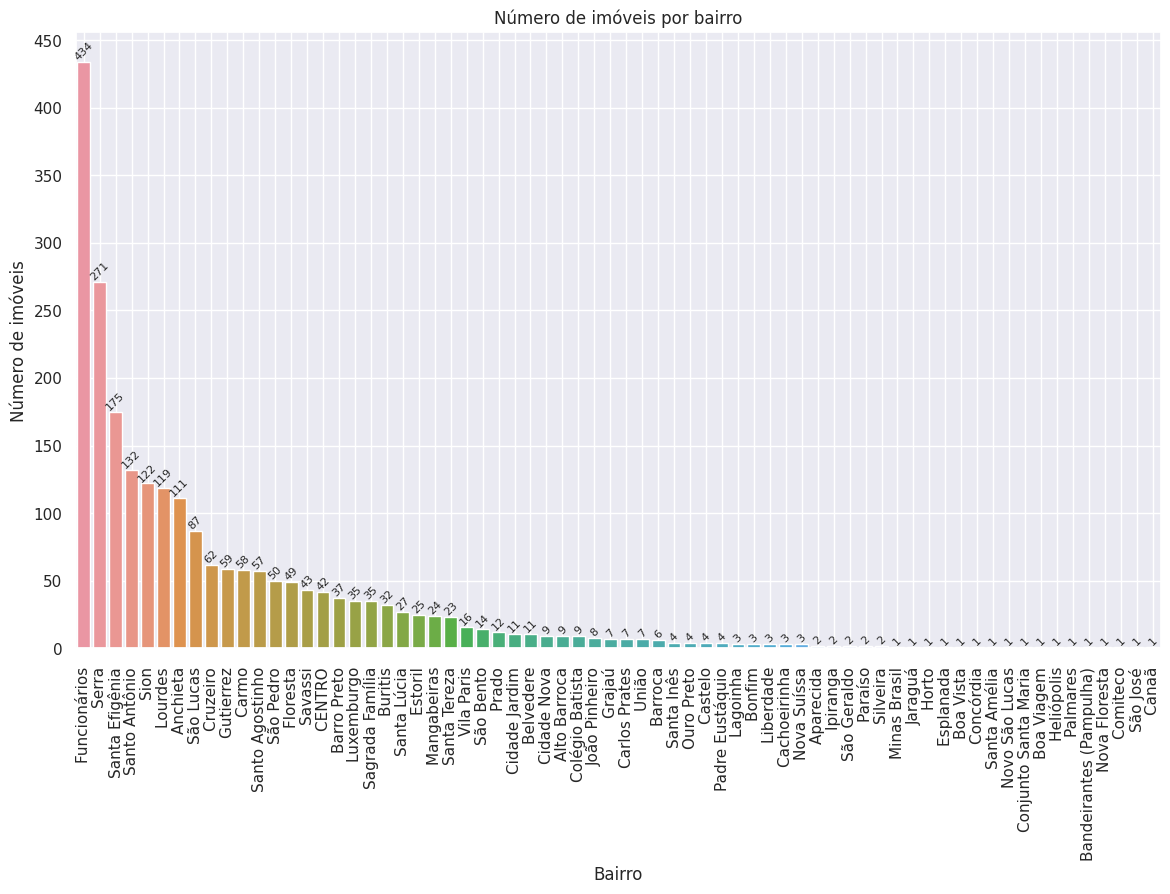

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

filtered_counts = df['Bairro'].value_counts().loc[lambda x: x > 0]

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=filtered_counts.index, y=filtered_counts)
plt.title('Número de imóveis por bairro')
plt.xlabel('Bairro')
plt.ylabel('Número de imóveis')

plt.xticks(rotation=90)

plt.ylim(bottom=1)

ax.yaxis.set_major_formatter(ScalarFormatter())

plt.yticks(ticks=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450])

plt.grid(True)

for x, y in zip(range(len(filtered_counts)), filtered_counts):
    plt.text(x, y, str(y), ha='center', va='bottom', rotation=45, fontsize=8)

plt.show()

**10 BAIRROS COM MAIOR IPTU MÉDIO**

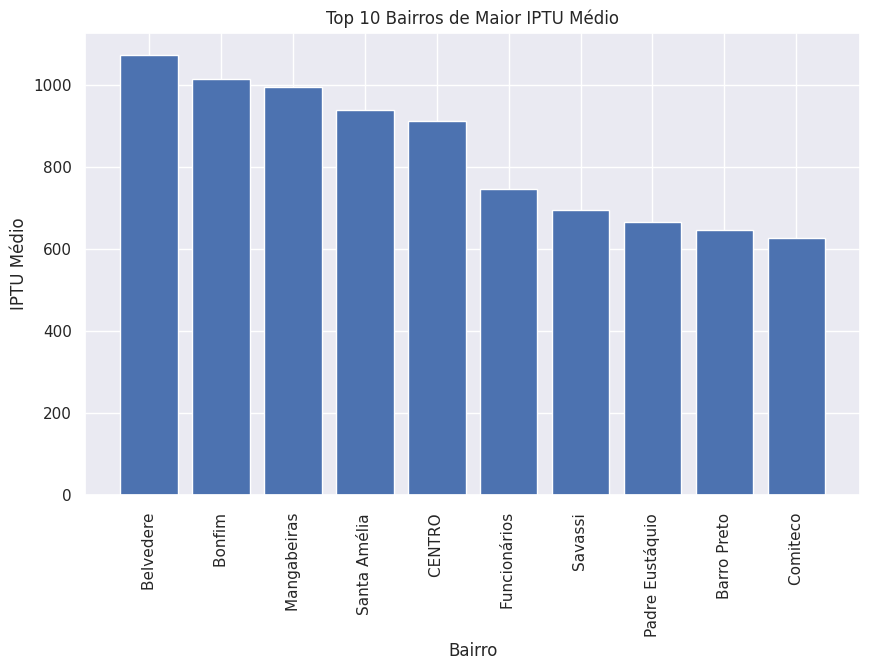

In [169]:
# Calcula o IPTU médio por bairro
df_iptu_medio_por_bairro = df.groupby('Bairro')['IPTU'].mean()

# Seleciona os 10 bairros de maior IPTU médio e ordena em ordem decrescente
top_10_maior_iptu_medio = df_iptu_medio_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior IPTU médio
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_iptu_medio.index, top_10_maior_iptu_medio.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio')
plt.title('Top 10 Bairros de Maior IPTU Médio')
plt.xticks(rotation=90)
plt.show()

**10 BAIRROS COM MENOR IPTU MÉDIO**

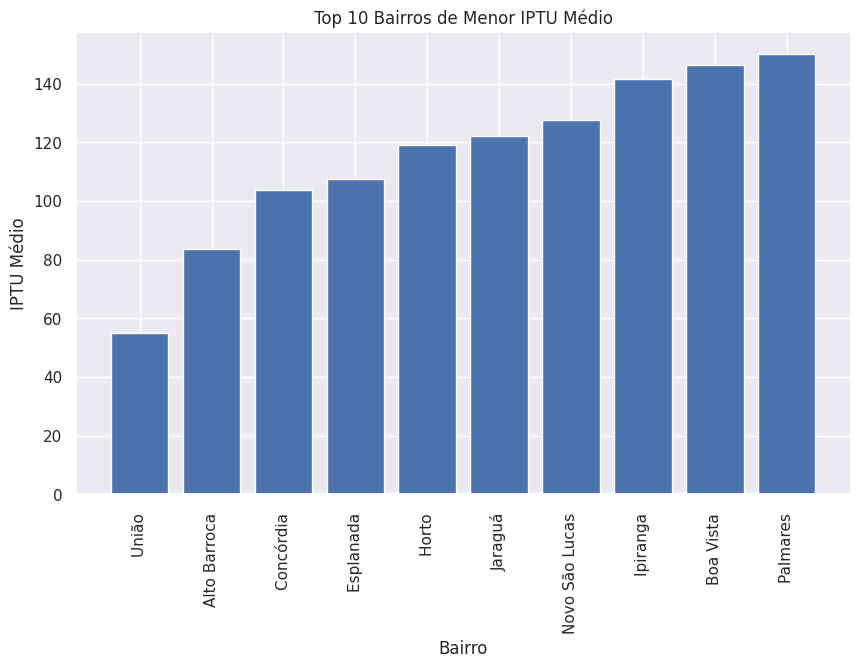

In [170]:
# Seleciona os 10 bairros de menor IPTU médio e ordena em ordem crescente
top_10_menor_iptu_medio = df_iptu_medio_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor IPTU médio
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_iptu_medio.index, top_10_menor_iptu_medio.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio')
plt.title('Top 10 Bairros de Menor IPTU Médio')
plt.xticks(rotation=90)
plt.show()

**10 BAIRROS COM MAIOR IPTU/M²**

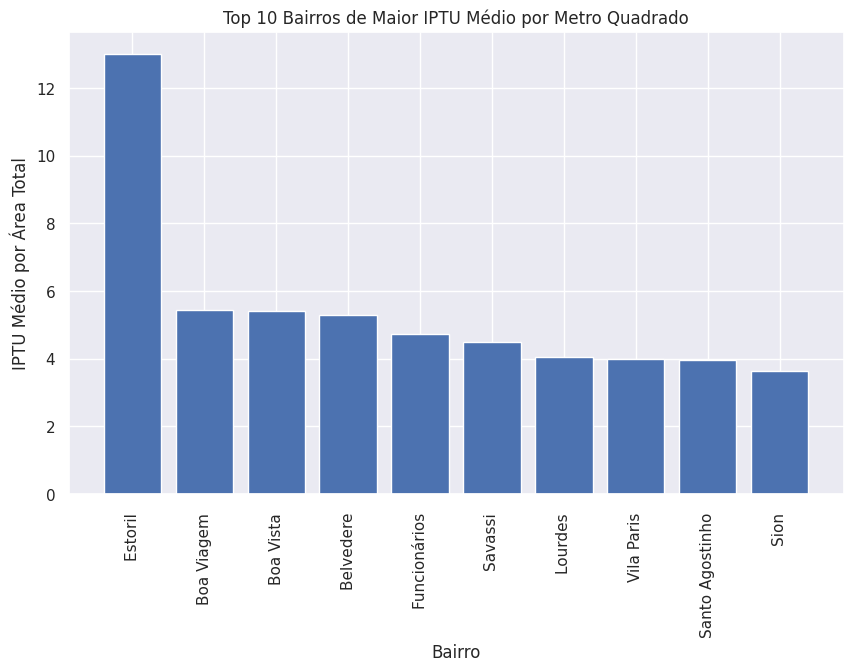

In [171]:
# Soma a área interna com a área externa para obter a área total do imóvel
df['Área total'] = df['Área interna'] + df['Área externa']

# Filtra os imóveis com área total maior que zero
df_area_total_maior_zero = df[df['Área total'] > 0]

# Calcula o IPTU médio por área total do imóvel e por bairro
df_iptu_medio_por_area_total_por_bairro = (df_area_total_maior_zero['IPTU'] / df_area_total_maior_zero['Área total']).groupby(df_area_total_maior_zero['Bairro']).mean()

# Seleciona os 10 bairros de maior IPTU médio por área total e ordena em ordem decrescente
top_10_maior_iptu_medio_por_area_total = df_iptu_medio_por_area_total_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior IPTU médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_iptu_medio_por_area_total.index, top_10_maior_iptu_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio por Área Total')
plt.title('Top 10 Bairros de Maior IPTU Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

**10 BAIRROS COM MENOR IPTU/M²**

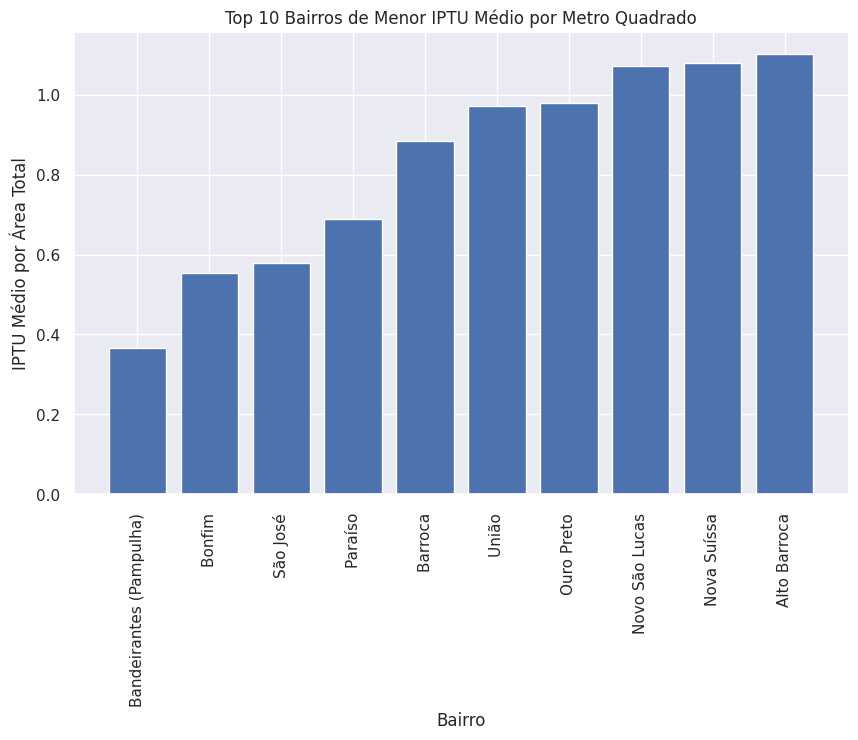

In [172]:
# Seleciona os 10 bairros de menor IPTU médio por área total e ordena em ordem crescente
top_10_menor_iptu_medio_por_area_total = df_iptu_medio_por_area_total_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor IPTU médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_iptu_medio_por_area_total.index, top_10_menor_iptu_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('IPTU Médio por Área Total')
plt.title('Top 10 Bairros de Menor IPTU Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

**Top 10 Bairros de Maior Condomínio Médio por Metro Quadrado**

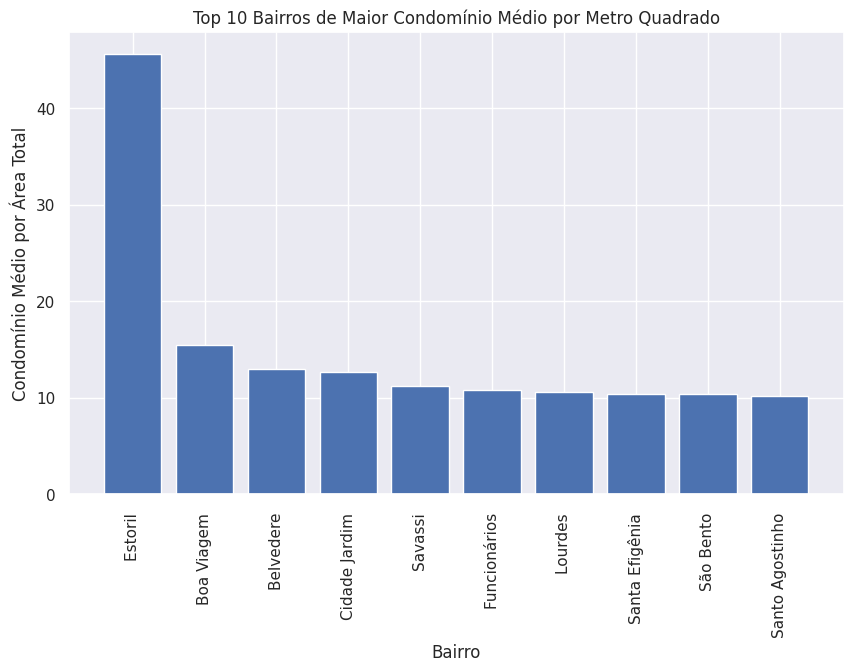

In [173]:
# Soma a área interna com a área externa para obter a área total do imóvel
df['Área total'] = df['Área interna'] + df['Área externa']

# Filtra os imóveis com área total maior que zero
df_area_total_maior_zero = df[df['Área total'] > 0]

# Calcula o Condomínio médio por área total do imóvel e por bairro
df_condominio_medio_por_area_total_por_bairro = (df_area_total_maior_zero['Condomínio'] / df_area_total_maior_zero['Área total']).groupby(df_area_total_maior_zero['Bairro']).mean()

# Seleciona os 10 bairros de maior Condomínio médio por área total e ordena em ordem decrescente
top_10_maior_condominio_medio_por_area_total = df_condominio_medio_por_area_total_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior Condomínio médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_condominio_medio_por_area_total.index, top_10_maior_condominio_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('Condomínio Médio por Área Total')
plt.title('Top 10 Bairros de Maior Condomínio Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

**Top 10 Bairros de Menor Condomínio Médio por Metro Quadrado**

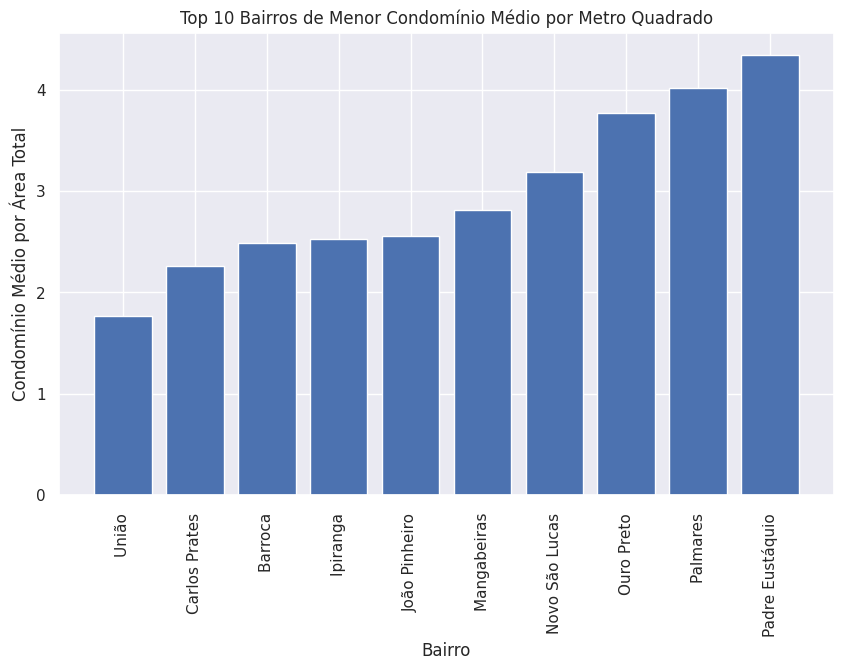

In [174]:
# Seleciona os 10 bairros de menor Condomínio médio por área total e ordena em ordem crescente
top_10_menor_condominio_medio_por_area_total = df_condominio_medio_por_area_total_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor Condomínio médio por área total
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_condominio_medio_por_area_total.index, top_10_menor_condominio_medio_por_area_total.values)
plt.xlabel('Bairro')
plt.ylabel('Condomínio Médio por Área Total')
plt.title('Top 10 Bairros de Menor Condomínio Médio por Metro Quadrado')
plt.xticks(rotation=90)
plt.show()

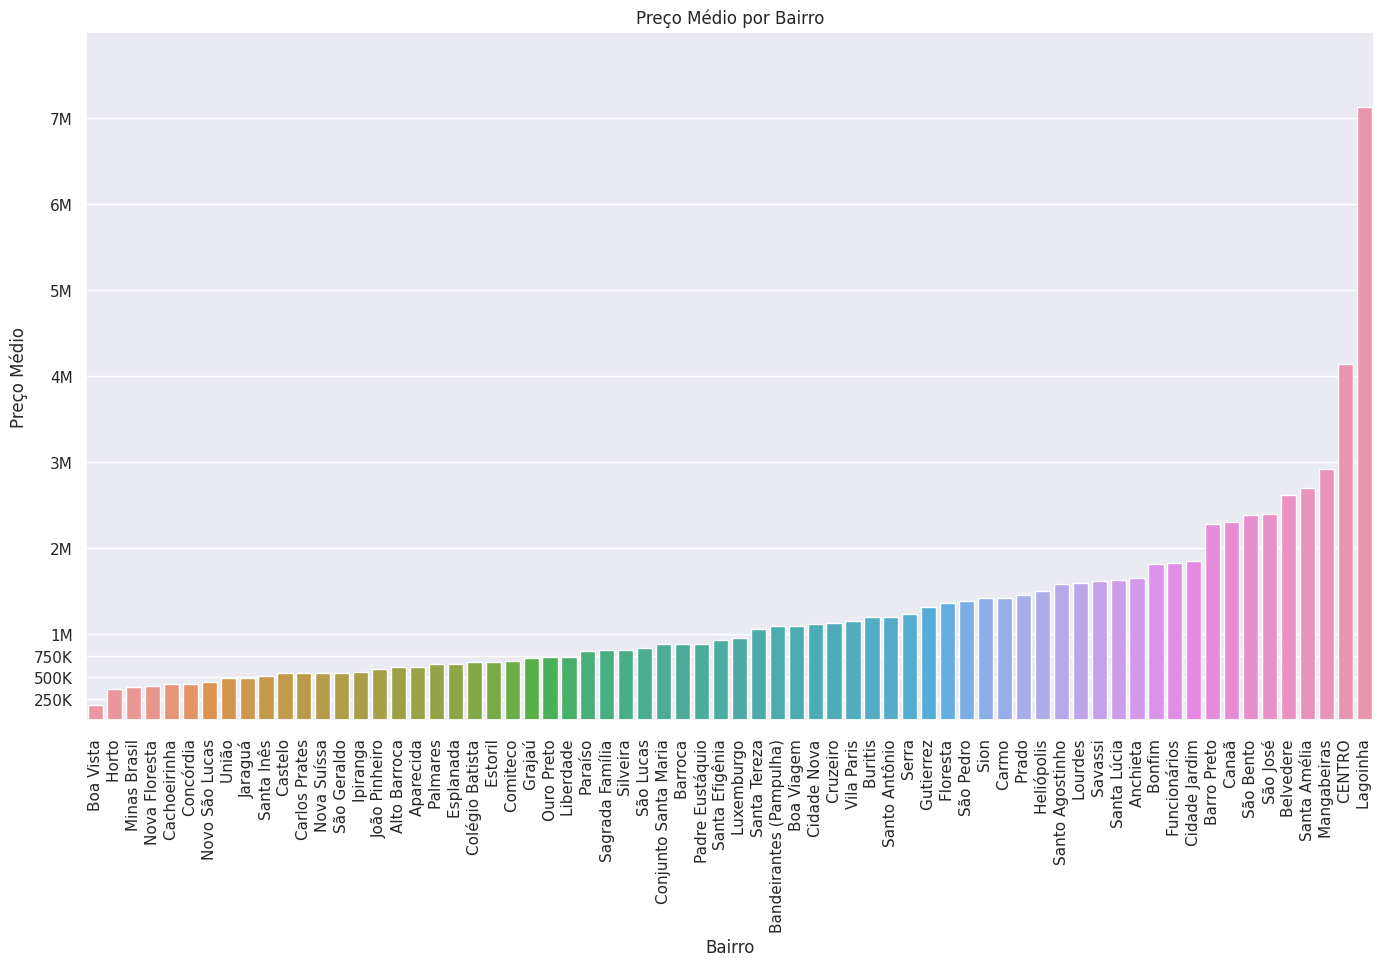

In [175]:
preco_medio_por_bairro = df.groupby('Bairro')['Preço'].mean().reset_index()

preco_medio_por_bairro = preco_medio_por_bairro.sort_values(by='Preço', ascending=True)

plt.figure(figsize=(14, 8))
sns.barplot(x='Bairro', y='Preço', data=preco_medio_por_bairro, orient='v')

plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Bairro')
plt.tight_layout()

# Nomes X axis verticais
plt.xticks(rotation='vertical')

#Formatar Y
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M' if x >= 1e6 else f'{x/1e3:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(ticks=plt.yticks()[0], labels=[formatter(tick) for tick in plt.yticks()[0]])

# Definir ticks Y
plt.yticks([250000, 500000, 750000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000],
           ['250K', '500K', '750K', '1M', '2M', '3M', '4M', '5M', '6M', '7M'])

# Grid
plt.grid(True, axis='y')

plt.show()

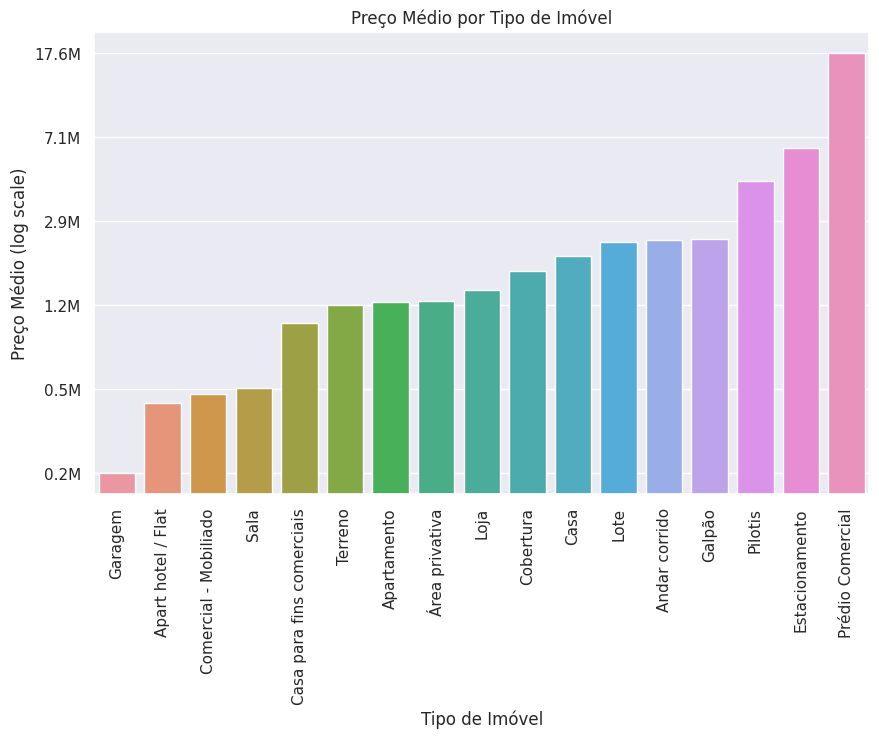

In [176]:
mean_price = df.groupby('Tipo Imóvel')['Preço'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_price.index, y=mean_price.values)

plt.xlabel('Tipo de Imóvel')
plt.ylabel('Preço Médio (log scale)')
plt.title('Preço Médio por Tipo de Imóvel')

# Nomes X axis verticais
plt.xticks(rotation='vertical')

# Formatar y pra millions
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M' if x >= 1e6 else f'{x/1e3:.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)
plt.yticks(ticks=plt.yticks()[0], labels=[formatter(tick) for tick in plt.yticks()[0]])

# Grid
plt.grid(True, axis='y')

# log scale
plt.yscale('log')
y_ticks = np.logspace(np.log10(mean_price.min()), np.log10(mean_price.max()), num=6, base=10)
plt.yticks(y_ticks, [f'{tick/1e6:.1f}M' for tick in y_ticks])


# Display the plot
plt.show()

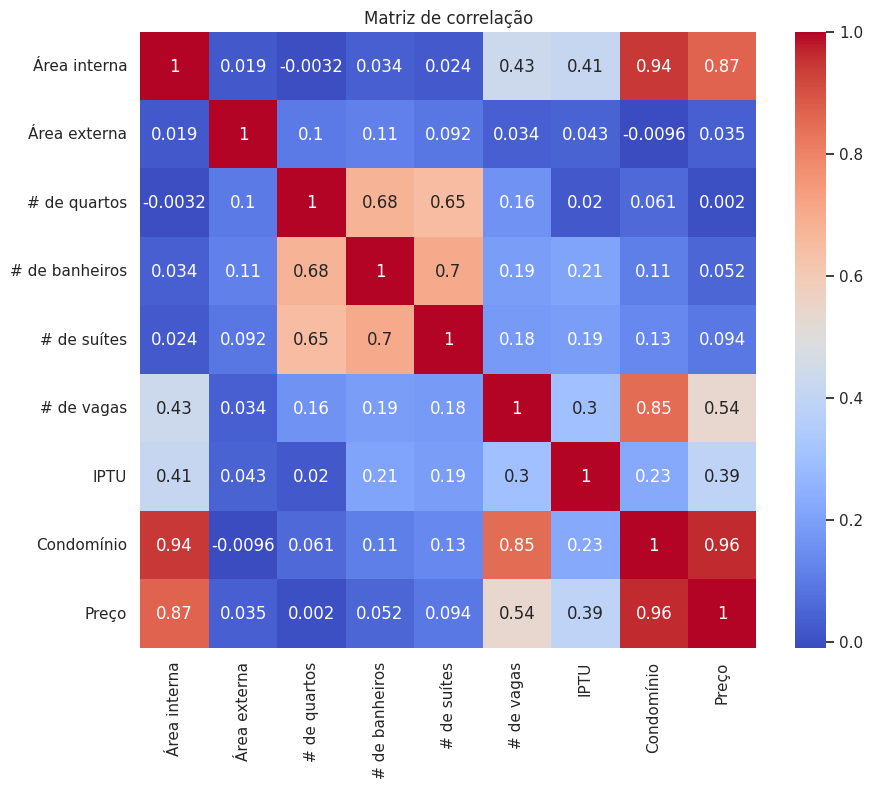

In [177]:
price_variables = ['Área interna', 'Área externa', '# de quartos', '# de banheiros', '# de suítes', '# de vagas', 'IPTU', 'Condomínio', 'Preço']
price_data = df[price_variables]

correlation_matrix = price_data.corr()

# Heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de correlação')

plt.show()

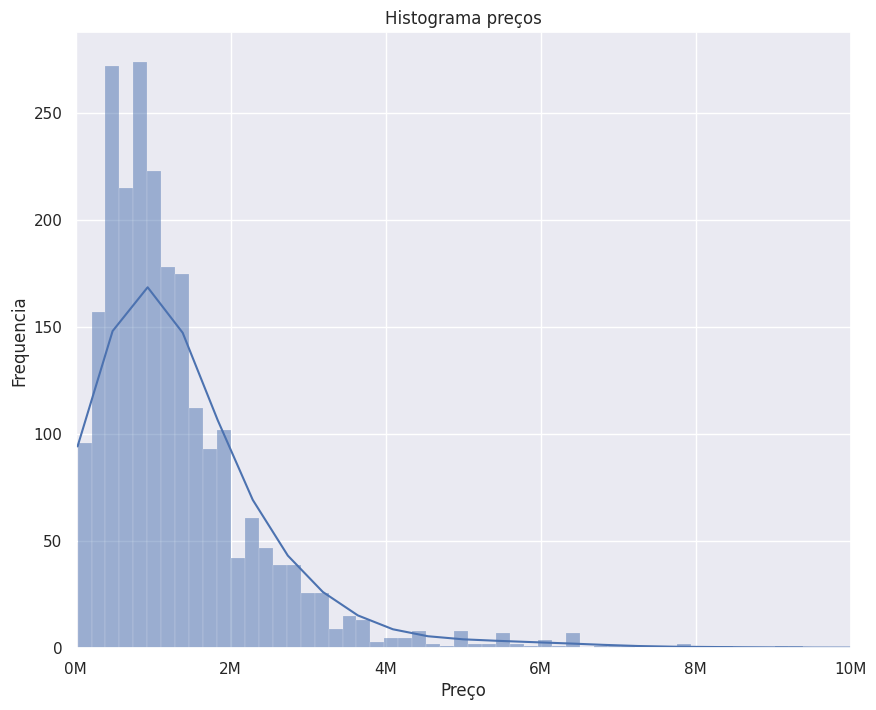

In [178]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))
sns.histplot(data=df, x="Preço", kde=True, bins=500)

plt.title("Histograma preços")
plt.ylabel('Frequencia')

plt.xlim(0, 10000000)

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

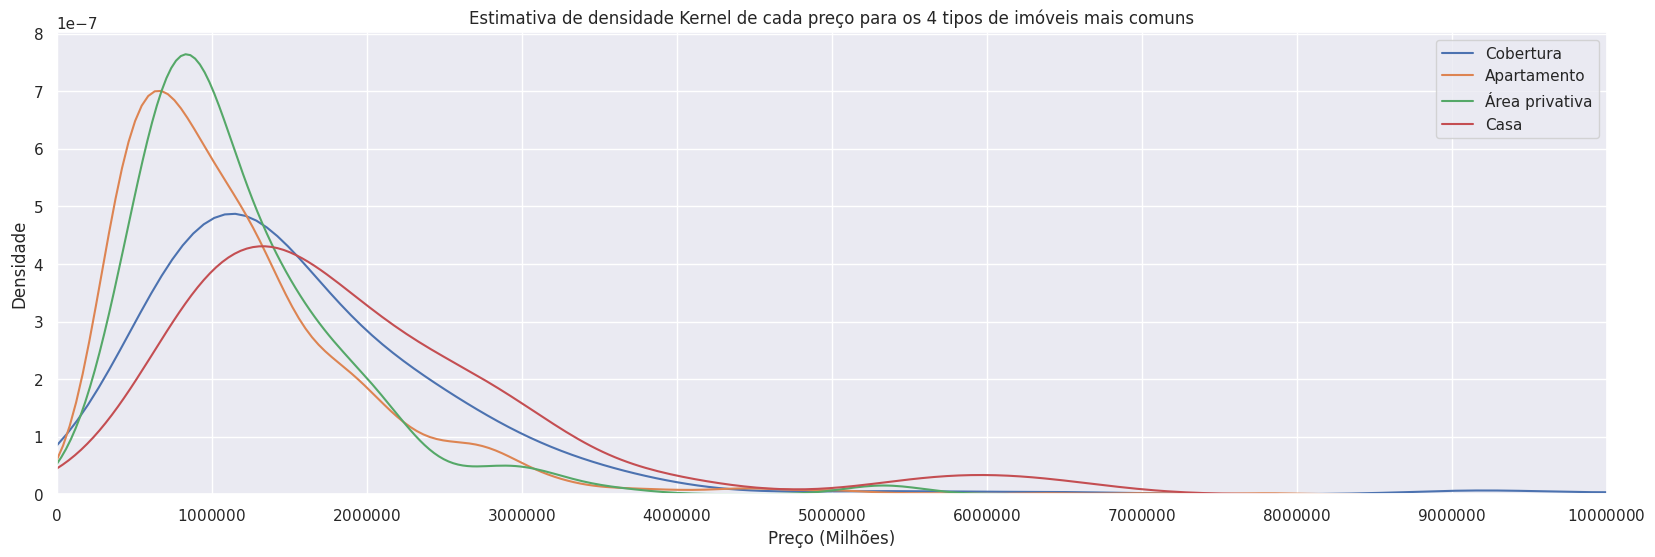

In [179]:
housing_types = ['Cobertura', 'Apartamento', 'Área privativa', 'Casa']
filtered_data = df[df['Tipo Imóvel'].isin(housing_types)]

plt.figure(figsize=(20, 6))

for housing_type in housing_types:
    data = filtered_data[filtered_data['Tipo Imóvel'] == housing_type]['Preço']
    sns.kdeplot(data, label=housing_type, clip=(0, None))

plt.xlabel('Preço (Milhões)')
plt.ylabel('Densidade')
plt.title('Estimativa de densidade Kernel de cada preço para os 4 tipos de imóveis mais comuns')

formatter = ScalarFormatter(useOffset=False, useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((-3, 4))
plt.gca().xaxis.set_major_formatter(formatter)


major_locator = MultipleLocator(1000000)
plt.gca().xaxis.set_major_locator(major_locator)

plt.xlim(0, 10000000)

plt.legend()
plt.show()

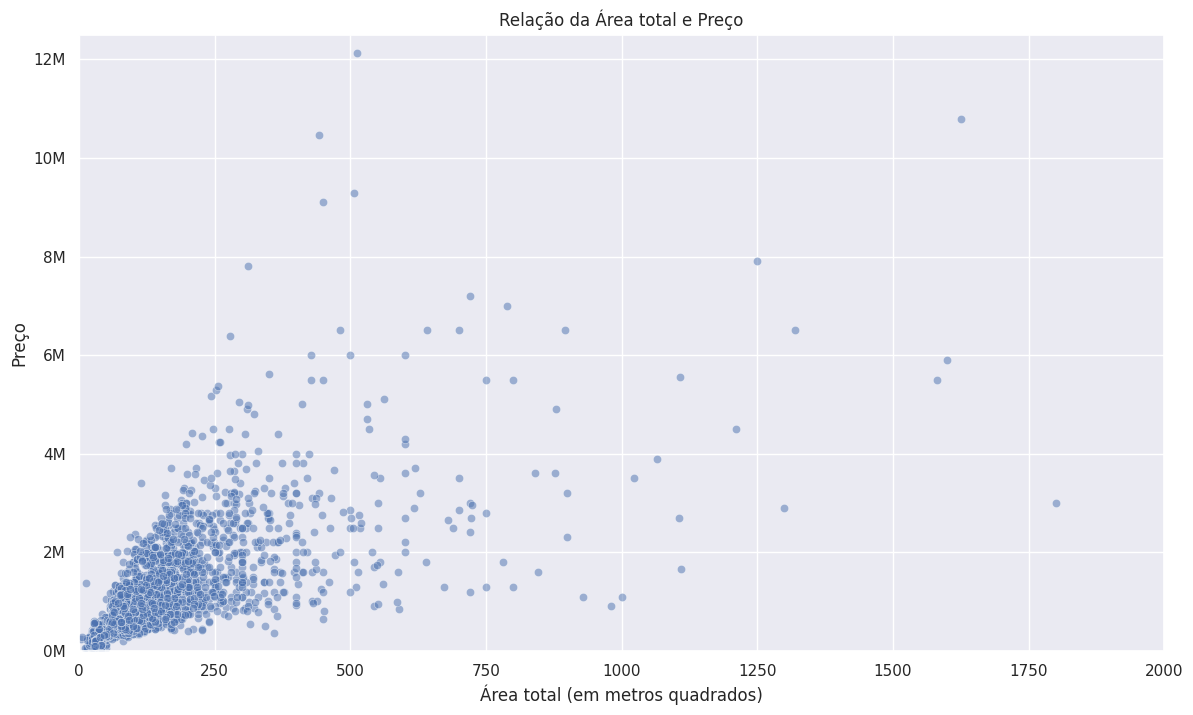

In [180]:
df['Área total'] = df['Área interna'] + df['Área externa']

# Filtra os imóveis com área total maior que zero
df_area_total_maior_zero = df[df['Área total'] > 0]

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_area_total_maior_zero, x='Área total', y='Preço', alpha=0.5)

plt.title("Relação da Área total e Preço")
plt.xlabel("Área total (em metros quadrados)")
plt.ylabel("Preço")

plt.xlim(0, 2000)
plt.ylim(0,12500000)

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

# Área total

**Boxplot das áreas totais do imóveis**

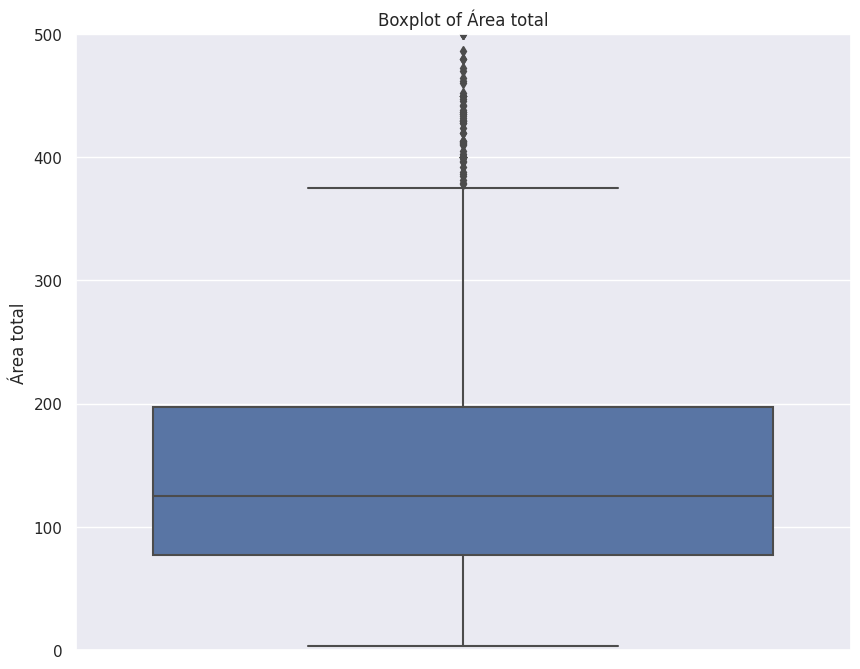

In [181]:
df_area_total_maior_zero = df[df['Área total'] > 0]

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_area_total_maior_zero, y='Área total')

plt.title("Boxplot da Área total")
plt.ylabel("Área total")

plt.ylim(0,500)

plt.show()

# Área interna:

In [182]:
maior_area_interna = df['Área interna'].max()
print(f'A maior área interna é: {maior_area_interna}')

A maior área interna é: 17125.0


**Histograma dos valores de área interna dos dados**

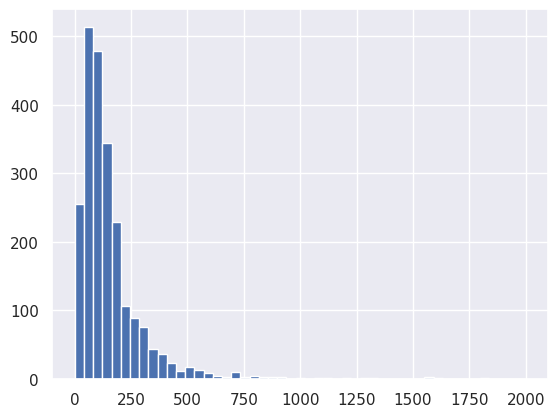

In [183]:
#histograma dos valores de área interna dos dados
bin_edges = np.linspace(0, 2000, 50)
plt.hist(df['Área interna'], bins=bin_edges)
plt.show()

**Maiores e menores áreas internas médias por bairro**

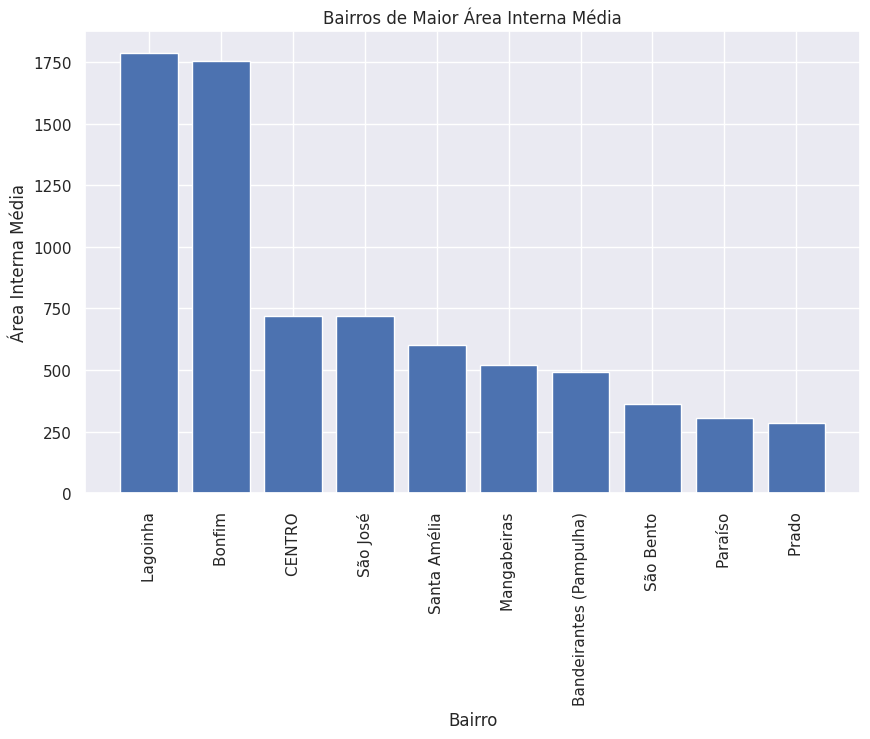

In [184]:
# Calcula a área interna média por bairro, excluindo os imóveis que não possuem área interna 
df_area_interna_media_por_bairro = df.loc[df['Área interna'] != 0].groupby('Bairro')['Área interna'].mean()

# Seleciona os 10 bairros de maior área interna média e ordena em ordem decrescente
top_10_maior_area_interna_media = df_area_interna_media_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_area_interna_media.index,top_10_maior_area_interna_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Interna Média')
plt.title('Bairros de Maior Área Interna Média')
plt.xticks(rotation=90)
plt.show()

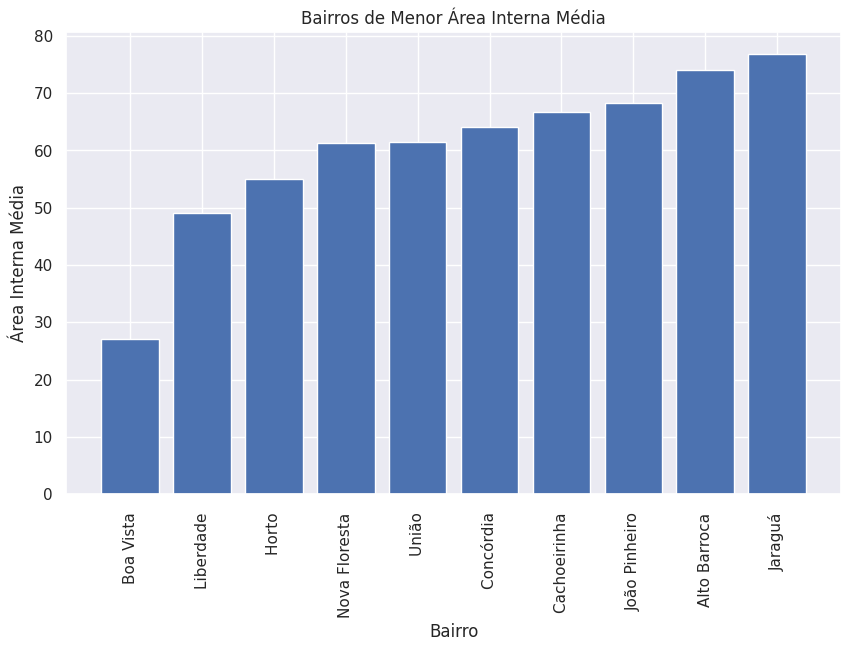

In [185]:
# Seleciona os 10 bairros de menor área interna média e ordena em ordem crescente
top_10_menor_area_interna_media = df_area_interna_media_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de menor área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_area_interna_media.index, top_10_menor_area_interna_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Interna Média')
plt.title('Bairros de Menor Área Interna Média')
plt.xticks(rotation=90)
plt.show()

# Área externa:

In [186]:
maior_area_externa = df['Área externa'].max()
print(f'A maior área externa é: {maior_area_externa}')

A maior área externa é: 1042.0


**Bairros com mais imóveis com área externa**

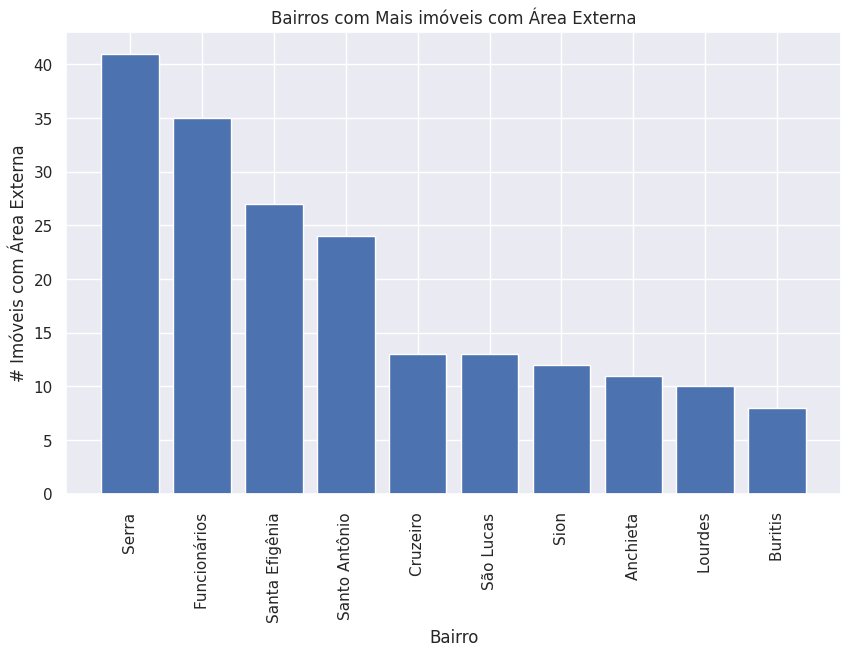

In [187]:
condition = (df['Área externa'] != 0)
df_area_externa = df[condition].groupby('Bairro')['Área externa'].count()
# Seleciona os 10 bairros de mais imóveis com área externa e ordena em ordem decrescente
bairros_com_mais_imóveis_com_area_externa = df_area_externa.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros com mais imóveis com área externa
plt.figure(figsize=(10, 6))
plt.bar(bairros_com_mais_imóveis_com_area_externa.index,bairros_com_mais_imóveis_com_area_externa.values)
plt.xlabel('Bairro')
plt.ylabel('# Imóveis com Área Externa')
plt.title('Bairros com Mais imóveis com Área Externa')
plt.xticks(rotation=90)
plt.show()

**Histograma dos valores de área interna dos dados**

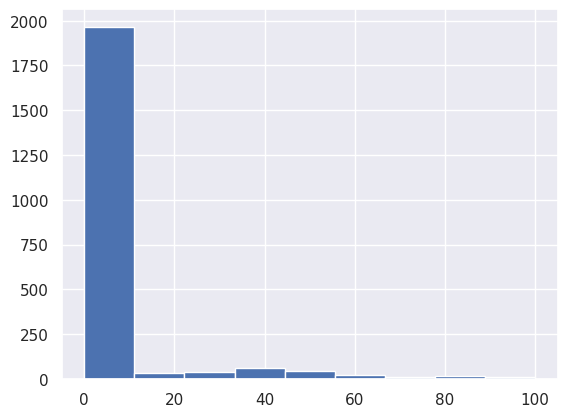

In [188]:
bin_edges = np.linspace(0, 100, 10)
plt.hist(df.loc[df['Área interna'] != 0]['Área externa'], bins=bin_edges)
plt.show()

**Maiores e menores áreas externas médias por bairro**

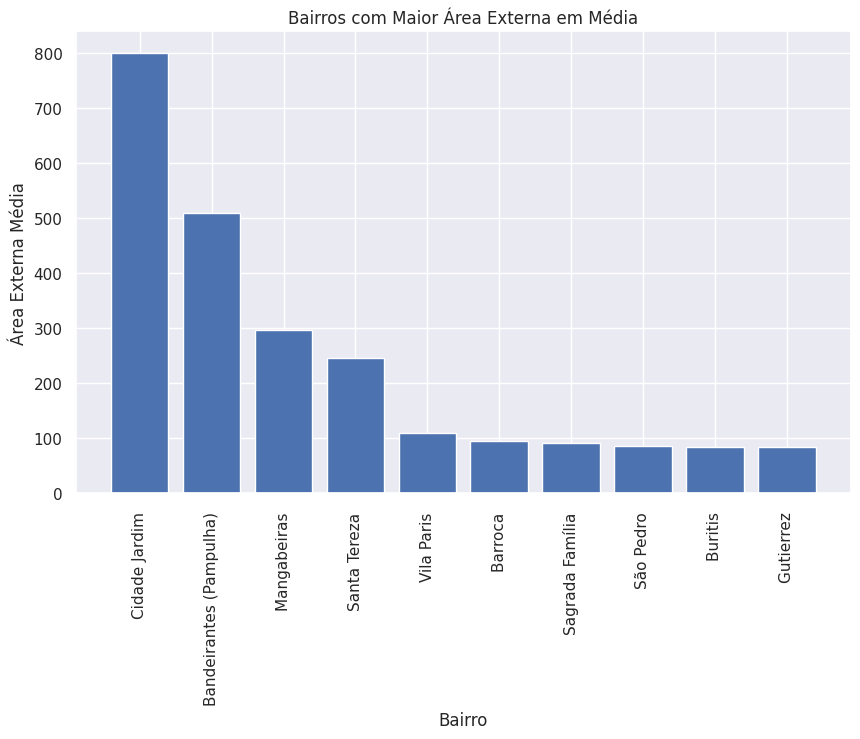

In [189]:
# Calcula a área externa média por bairro, excluindo os imóveis que não possuem área externa 
df_area_externa_media_por_bairro = df.loc[df['Área externa'] != 0].groupby('Bairro')['Área externa'].mean()

# Seleciona os 10 bairros de maior área interna média e ordena em ordem decrescente
top_10_maior_area_externa_media = df_area_externa_media_por_bairro.nlargest(10).sort_values(ascending=False)

# Cria o gráfico dos 10 bairros de maior área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_maior_area_externa_media.index,top_10_maior_area_externa_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Externa Média')
plt.title('Bairros com Maior Área Externa em Média')
plt.xticks(rotation=90)
plt.show()

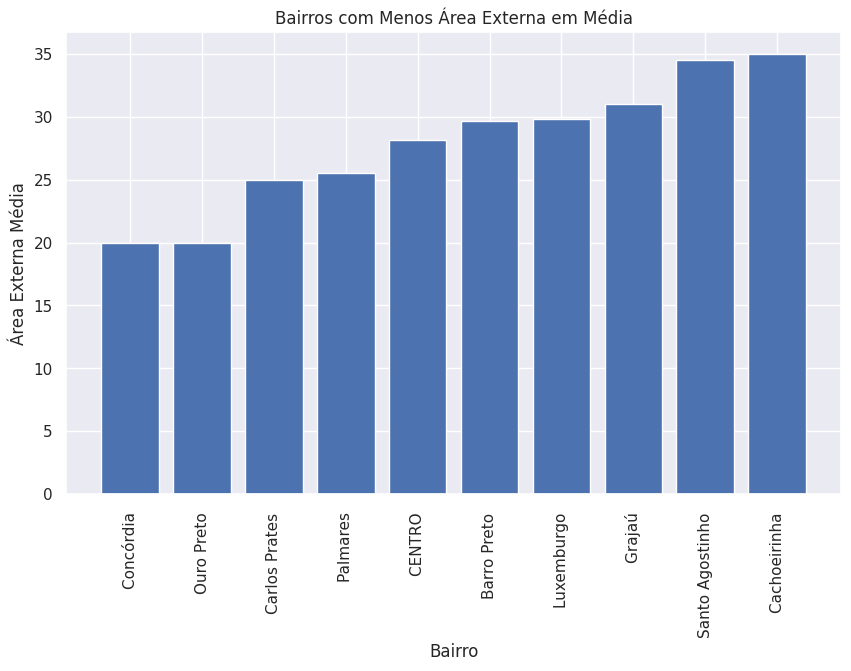

In [190]:
# Seleciona os 10 bairros de menor área externa média e ordena em ordem crescente
top_10_menor_area_externa_media = df_area_externa_media_por_bairro.nsmallest(10).sort_values(ascending=True)

# Cria o gráfico dos 10 bairros de maior área interna média
plt.figure(figsize=(10, 6))
plt.bar(top_10_menor_area_externa_media.index,top_10_menor_area_externa_media.values)
plt.xlabel('Bairro')
plt.ylabel('Área Externa Média')
plt.title('Bairros com Menos Área Externa em Média')
plt.xticks(rotation=90)
plt.show()

**Relação entre a área total e o IPTU**

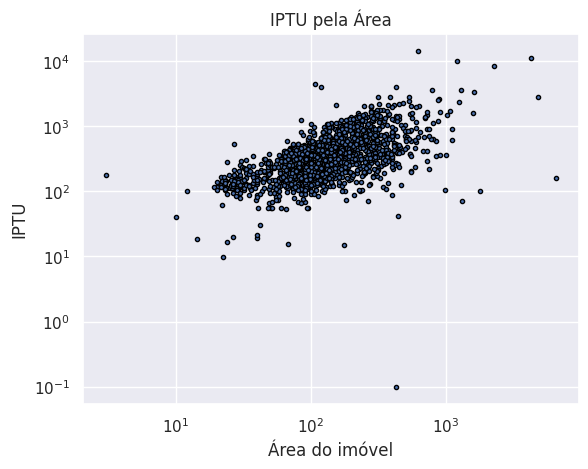

In [191]:
#relação entre área total e IPTU
plt.scatter(df['Área total'], df['IPTU'], edgecolors="black", marker=".")
# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Área do imóvel')
plt.ylabel('IPTU')
plt.title('IPTU pela Área')

# Display the plot
plt.show()